<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab1/B41_E22CSEU1205_SHRISTI/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts
from skimage.segmentation import watershed
from scipy import ndimage
from scipy import ndimage

In [3]:
image_path = '/content/Picture1.jpg'  # Replace with your image file
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

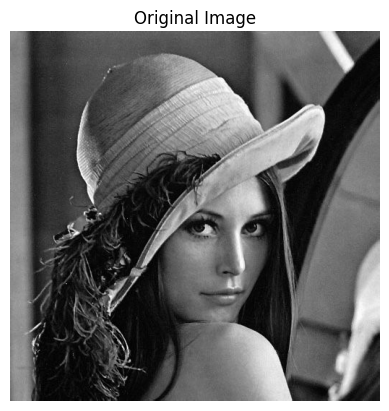

In [4]:
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [5]:
height, width, channels = image_rgb.shape
print(f"Image Size: Height={height}, Width={width}, Channels={channels}")

Image Size: Height=512, Width=512, Channels=3


In [6]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_image.jpg", image_gray)

True

In [7]:
_, binary_image = cv2.threshold(image_gray, 128, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary_image.jpg", binary_image)

True

In [8]:
black_pixel_count = np.sum(binary_image == 0)
print(f"Black Pixel Count: {black_pixel_count}")
print(f"Total Pixels in Grayscale Image: {image_gray.size}")

Black Pixel Count: 200658
Total Pixels in Grayscale Image: 262144


Task 2

In [9]:
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)


In [10]:
prewitt_edge = prewitt(image_gray)

In [11]:
roberts_edge = roberts(image_gray)

In [12]:
canny_edge = cv2.Canny(image_gray, 100, 200)

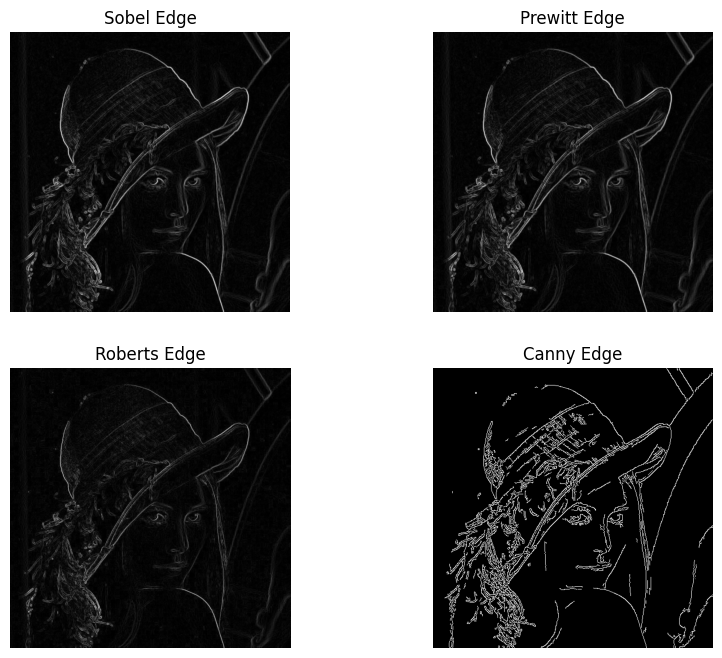

In [14]:
plt.figure(figsize=(10, 8))
titles = ['Sobel Edge', 'Prewitt Edge', 'Roberts Edge', 'Canny Edge']
images = [sobel_edge, prewitt_edge, roberts_edge, canny_edge]
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

In [15]:
_, global_thresh = cv2.threshold(image_gray, 128, 255, cv2.THRESH_BINARY)

In [16]:
adaptive_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

In [17]:
canny_segment = canny_edge

In [18]:
distance = ndimage.distance_transform_edt(global_thresh)
_, markers = cv2.connectedComponents(np.uint8(global_thresh))
markers = markers + 1
watershed_segment = watershed(-distance, markers, mask=global_thresh)

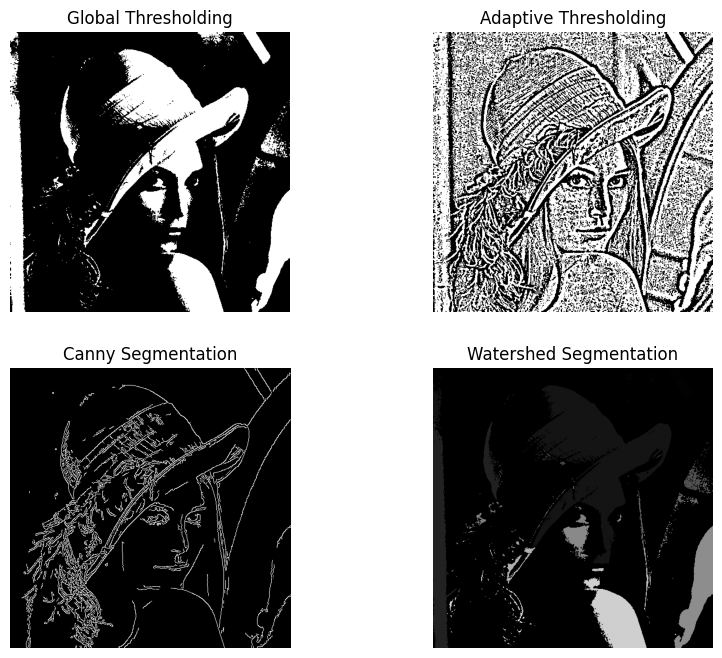

In [19]:
plt.figure(figsize=(10, 8))
titles = ['Global Thresholding', 'Adaptive Thresholding', 'Canny Segmentation', 'Watershed Segmentation']
images = [global_thresh, adaptive_thresh, canny_segment, watershed_segment]
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()